In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('Tuition_Assistance.csv')

In [4]:
print('Shape of dataframe df:{}'.format(df.shape))

Shape of dataframe df:(4028, 7)


<ipython-input-23-8ca955a3b18f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(a.get_yticklabels(),rotation=30)


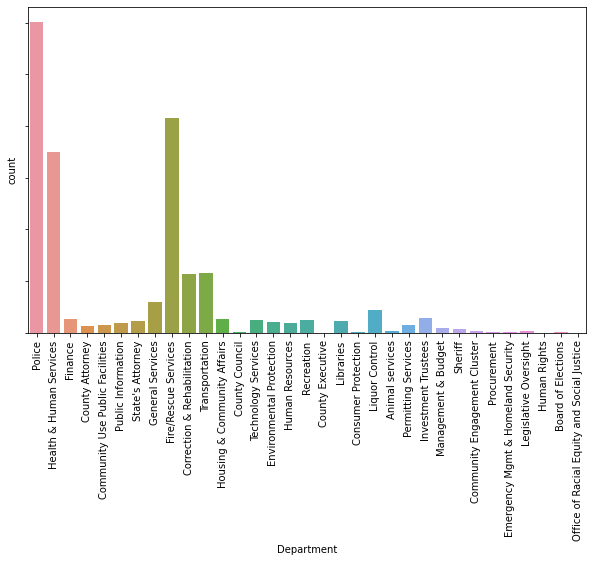

In [23]:
plt.figure(figsize=(10,6))
a=sns.countplot(x='Department',data=df)
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

<ipython-input-24-014eebd63dcf>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(a.get_yticklabels(),rotation=30)


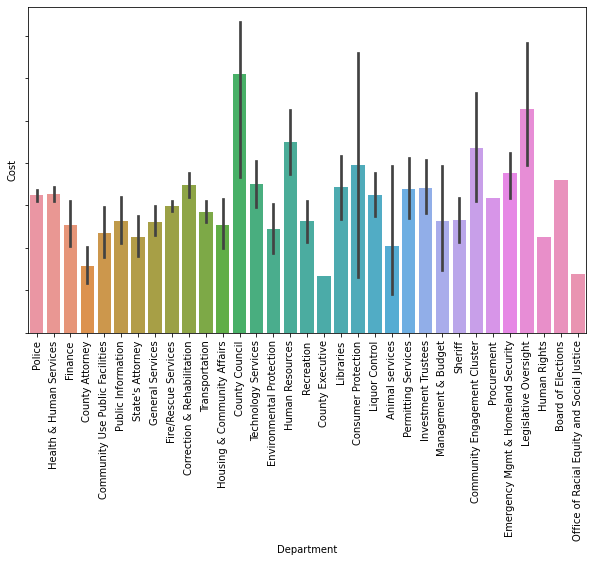

In [24]:
plt.figure(figsize=(10,6))
a=sns.barplot(x='Department',y='Cost',data=df)
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

In [54]:
# plt.figure(figsize=(10,6))
# a=sns.boxplot(x='Department',y='Major',data=df)
# a.set_xticklabels(a.get_xticklabels(),rotation=90)
# a.set_yticklabels(a.get_yticklabels(),rotation=30)
# plt.show()

In [52]:
# plt.figure(figsize=(16,10))
# a=sns.stripplot(x='School',y='Major',data=df,hue='Cost')
# a.set_xticklabels(a.get_xticklabels(),rotation=90)
# #a.set_yticklabels(a.get_yticklabels(),rotation=30)
# plt.show()

[Text(0, 0, 'Business/Admin./Mgmt.'),
 Text(1, 0, 'Other/Misc.'),
 Text(2, 0, 'Accounting (Business)'),
 Text(3, 0, 'Pre-Nursing'),
 Text(4, 0, 'Health & Human Services'),
 Text(5, 0, 'Not Listed'),
 Text(6, 0, 'Information Technology'),
 Text(7, 0, 'Communication'),
 Text(8, 0, 'Finance (Business)'),
 Text(9, 0, 'Criminal Justice'),
 Text(10, 0, 'Psychology'),
 Text(11, 0, 'Paralegal Studies'),
 Text(12, 0, 'African-American Studies'),
 Text(13, 0, 'Agricultural General'),
 Text(14, 0, 'Fire Protection Engineering'),
 Text(15, 0, 'None'),
 Text(16, 0, 'Community Health'),
 Text(17, 0, 'Political Science'),
 Text(18, 0, 'Government and Politics'),
 Text(19, 0, 'Social Work'),
 Text(20, 0, 'Public Administration'),
 Text(21, 0, 'General Studies'),
 Text(22, 0, 'English Language and Literature'),
 Text(23, 0, 'Forensic Science'),
 Text(24, 0, 'Fire Science'),
 Text(25, 0, 'Civil and Environmental Engineering'),
 Text(26, 0, 'Law'),
 Text(27, 0, 'Emergency Management'),
 Text(28, 0, 'Huma

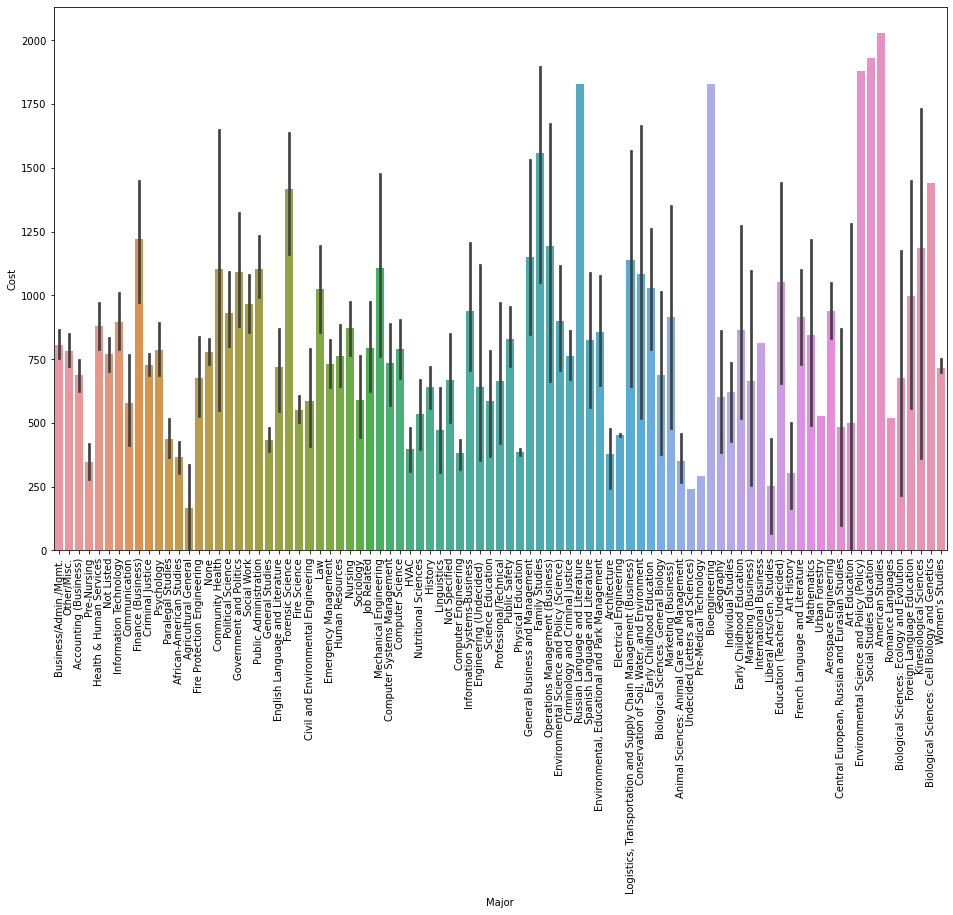

In [68]:
plt.figure(figsize=(16,10))
a=sns.barplot(x='Major',y='Cost',data=df)
a.set_xticklabels(a.get_xticklabels(),rotation=90)
#a.set_yticklabels(a.get_yticklabels(),rotation=30)
#plt.show()


In [69]:
plt.show()

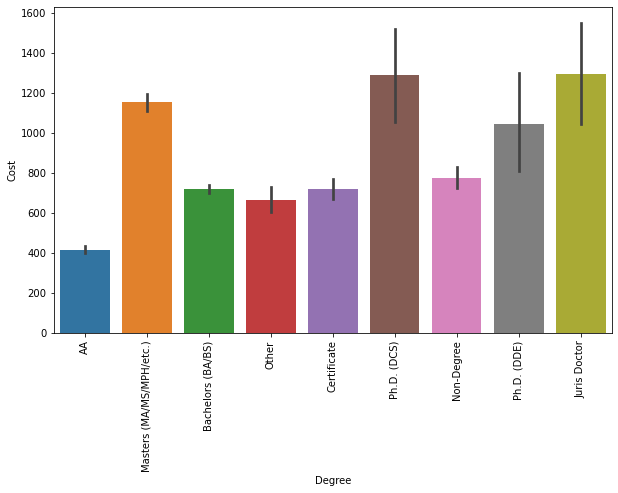

<Figure size 432x288 with 0 Axes>

In [70]:
plt.figure(figsize=(10,6))
a=sns.barplot(x='Degree',y='Cost',data=df)
a.set_xticklabels(a.get_xticklabels(),rotation=90)
#a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()
plt.savefig('degree_png.png')

Text(0.5, 1.0, 'Department Vs Cost')

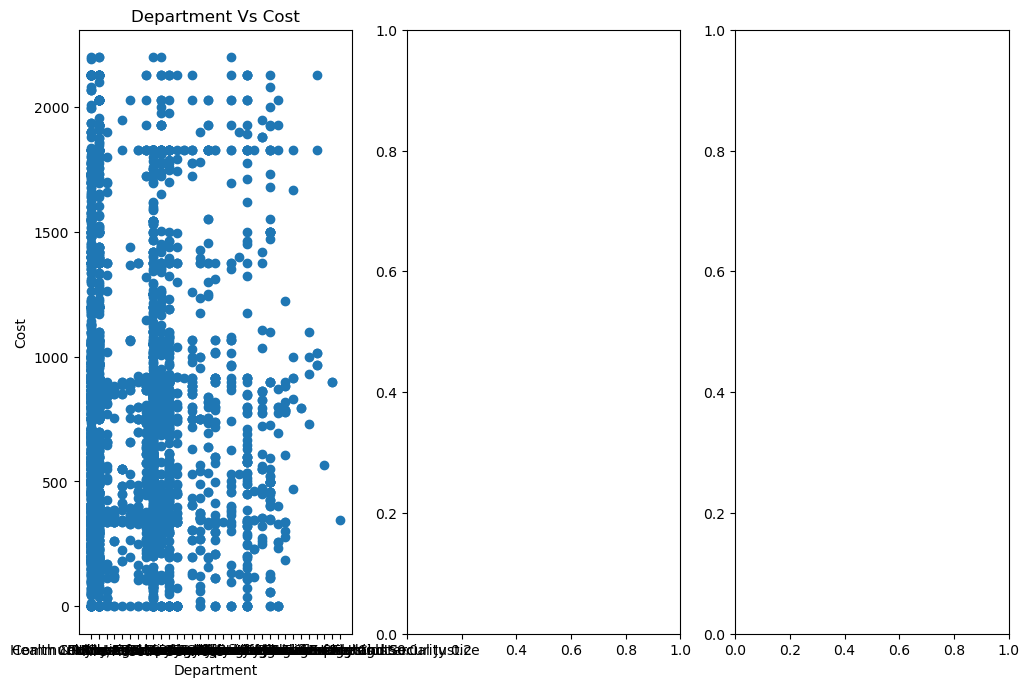

In [4]:
figure,axes = plt.subplots(1,3,dpi = 100,figsize=(12,8))
axes[0].scatter(df['Department'],df['Cost'])
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Cost')
axes[0].set_title('Department Vs Cost')
# axes[1].scatter(data['bedrooms'],data['price'])
# axes[1].set_xlabel('Bedrooms')
# axes[1].set_ylabel('Price')
# axes[1].set_title('BEdrooms Vs Price')
# axes[2].scatter(data['age'],data['price'])
# axes[2].set_xlabel('Age')
# axes[2].set_ylabel('Price')
# axes[2].set_title('Age Vs Price')
# figure.suptitle('HomePrices',fontsize=16)
# figure.subplots_adjust(wspace=1,hspace=2)

In [4]:
df.head(10)

,Department,Major,Degree,School,Course Title,Course Description,Cost
0,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRODUCTION TO BUSINESS,An introductory course designed to survey the ...,392.0
1,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,MA 160,A general calculus course primarily for busine...,392.0
2,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRO TO AMERICAN MUSIC,A survey of American popular music from the tu...,392.0
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),BOWIE STATE UNIVERSITY,PUBLIC POLICY ANALYSIS,Focus is on the analysis of costs and benefits...,1062.0
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),Mount St Mary's University,MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,"The historical, current, and future organizati...",1569.0
5,Finance,Accounting (Business),Masters (MA/MS/MPH/etc.),University of Maryland - University College,ACCT FINANCIAL MGMT CAPSTONE,A synthesis of material from all previous stud...,870.0
6,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,ACCOUNTING 202,The study and analysis of managerial accountin...,392.0
7,Health & Human Services,Pre-Nursing,AA,PRINCE GEORGE'S COMMUNITY COLLEGE,NUTRITION ONLINE,Addresses basic information about essential nu...,294.0
8,County Attorney,Health & Human Services,Bachelors (BA/BS),University of Maryland - University College,"WRTG 101, INTRODUCTION TO WRITING",practice in effective writing and clear thinki...,0.0
9,Health & Human Services,Not Listed,Masters (MA/MS/MPH/etc.),University of Maryland - Baltimore,CLINICAL ADV FIELD PRACTICUM - SWCL 794 - 01,Two semesters in the Advanced Curriculum. Assi...,1830.0


In [3]:
df[df['Course Title']=='***NOT APPLICABLE***']

,Department,Major,Degree,School,Course Title,Course Description,Cost
1581,Police,Criminal Justice,Masters (MA/MS/MPH/etc.),"UNIVERSITY OF MARYLAND, UNIVERSITY COLLEGE",***NOT APPLICABLE***,GRADUATION FEE REQUIRED FOR UMUC ADMIN TO REVI...,50.00
2257,Transportation,Urban Forestry,Certificate,Oregon State University,***NOT APPLICABLE***,SNR511,528.00
2376,Transportation,Accounting (Business),Masters (MA/MS/MPH/etc.),GEORGE MASON UNIVERSITY,***NOT APPLICABLE***,Advanced Taxation,915.00
2753,Fire/Rescue Services,Fire Science,AA,PRINCE GEORGE'S COMMUNITY COLLEGE,***NOT APPLICABLE***,unknown math class depending on placement test,0.00
2858,Police,Sociology,AA,FREDERICK COMMUNITY COLLEGE,***NOT APPLICABLE***,CMM103- Introduction to film: Presents an anal...,366.00
2864,Housing & Community Affairs,None,Non-Degree,RedVector Convergence Training,***NOT APPLICABLE***,These are online continuing education classes ...,808.88
3947,Health & Human Services,Social Work,Certificate,The Wright Institute,***NOT APPLICABLE***,Trainer: Dafna LenderDafna Lender\n\nThis is a...,875.00


In [3]:
df['Course Title'] = df['Course Title'].replace(to_replace='***NOT APPLICABLE***',
    value='TEAM SKILLS RESCUE WORKSHOP')

In [4]:
df[df['Course Title']=='***NOT APPLICABLE***']

,Department,Major,Degree,School,Course Title,Course Description,Cost


In [6]:
df['Course Title'].value_counts()

TEAM SKILLS RESCUE WORKSHOP                                              18
DYNAMIC CQC                                                              17
GLOCK ARMORER'S COURSE                                                   14
COMBAT PISTOL                                                            13
STATISTICS                                                               11
                                                                         ..
HEALTH ILLNESS AND HEALING                                                1
PUAD 630 - ANALYTICAL TECHNIQUES                                          1
BMGT340 BUSINESS FINANCE                                                  1
ETHICS AND PROFESSIONAL CONDUCT FOR VIRGINIA CPAS ONLINE-2016 EDITION     1
ADVANCED ROADSIDE INTERVIEW TECHNUIQUES                                   1
Name: Course Title, Length: 3029, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Department          4028 non-null   object 
 1   Major               4028 non-null   object 
 2   Degree              4028 non-null   object 
 3   School              4028 non-null   object 
 4   Course Title        4028 non-null   object 
 5   Course Description  3844 non-null   object 
 6   Cost                4028 non-null   float64
dtypes: float64(1), object(6)
memory usage: 220.4+ KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 6 categorical variables


In [8]:

print(categorical)

['Department', 'Major', 'Degree', 'School', 'Course Title', 'Course Description']


In [9]:
len(df['Department'].unique())

33

In [10]:

numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 1 numerical variables


In [11]:
df[numerical].head()

,Cost
0,392.0
1,392.0
2,392.0
3,1062.0
4,1569.0


In [12]:
#df['Department'].unique().tolist()

In [13]:
len(df['Major'].unique())

89

In [14]:
df[df['Major'] == 'None']

,Department,Major,Degree,School,Course Title,Course Description,Cost
57,Health & Human Services,None,Non-Degree,American College of Physicians (ACP),INTERNAL MEDICINE MAINTAINANCE OF CERTIFICATIO...,Internal Medicine Board review to prepare for ...,895.0
62,County Attorney,None,Non-Degree,Montgomery College Rockville Campus,SPANISH 101,A beginning language course focusing on the st...,336.0
63,County Attorney,None,Non-Degree,Montgomery College Rockville Campus,INTRODUCTION TO THE LEGAL SYSTEM,A general perspective of the legal system and ...,0.0
64,Fire/Rescue Services,None,Non-Degree,UNIVERSITY OF DC,FUNDAMENTALS OF ANATOMY & PHYSIOLOGY I,Focuses on the human body as it relates to fun...,915.0
78,Transportation,None,Non-Degree,UNIVERSITY OF PHOENIX,PERSONAL COMPUTER Os SUPPORT,This course is an introduction to the fundamen...,840.0
...,...,...,...,...,...,...,...
3956,Police,None,Non-Degree,Montgomery College Rockville Campus,TABLEAU 2,A good business dashboard informs with a glanc...,199.0
3970,Liquor Control,None,Non-Degree,SHRM TRAINING FOR PHR AND SPHR CERTIFICATION,COMMUNICATION SKILLS FOR LEADERS,There is no better place for HR professional d...,1500.0
3986,Fire/Rescue Services,None,Non-Degree,FIRE DEPARTMENT TRAINING NETWORK,ENGINE COMPANY OPERATIONS I,Truck company operations,900.0
3993,Police,None,Non-Degree,Personality Insights,� LEVEL 2 DISC,",DISC Level 2 Certification",2194.0


In [ ]:
df[df['Major'] == 'Not Listed']

In [16]:
df[df['Major'] == 'Not Specified']

,Department,Major,Degree,School,Course Title,Course Description,Cost
287,Health & Human Services,Not Specified,Masters (MA/MS/MPH/etc.),OFFICE OF EDUCATION AND TRAINING FOR ADDICTION...,ON CHEMICAL DEPENDENCE AND HUMAN DEVELOPMENT,This course examines the relationship between ...,160.00
400,Police,Not Specified,Certificate,MONTGOMERY COMMUNITY COLLEGE,HHS 034 PHLEBOTOMY TECH,"Classroom work includes medical terminology, a...",1730.00
417,Police,Not Specified,Certificate,"GEORGIA K9 NTC, LLC",K9 TRAILING SEMINAR,Trailing is a descriptive word for the art of ...,500.00
519,Fire/Rescue Services,Not Specified,Certificate,Appraisal Institute,15-HOUR NATIONAL USAP COURSE,Using the National USPAP Course material copyr...,335.00
531,Fire/Rescue Services,Not Specified,Certificate,Appraisal Institute,BASIC APPRAISAL PROCEDURES,This four-day course will introduce you to rea...,510.00
532,Fire/Rescue Services,Not Specified,Certificate,Appraisal Institute,BASIC APPAISAL PRINCIPLES,This four-day course will introduce you to rea...,510.00
946,Police,Not Specified,Certificate,ACADEMI,ADVANCED ACTIVE THREAT FOR LAW ENFORCEMENT (CU...,This 5 day course provides law enforcement wit...,1546.00
1246,Police,Not Specified,Bachelors (BA/BS),NATIONAL ASSOCIATION OF HOUSING AND REDEVELOPM...,SUCESSFUL PROJECT MANAGEMENT,Successful Project Management,203.00
1378,Police,Not Specified,Other,Indiana University,ROBERT F. BORKENSTEIN COURSE ON DUID: THE EFFE...,This course explores the relationship between ...,1500.00
1398,Police,Not Specified,Certificate,ACADEMI,ACTIVE ASSAILANT RESPONSE (CUSTOM COURSE),This 5 day course provides law enforcement wit...,1550.00


In [17]:
#df['Major'].value_counts()

In [ ]:
df[df['Major'] == 'None']
df[df['Major'] == 'Not Listed']
df[df['Major'] == 'Not Specified']

In [18]:
df.isna().sum()

Department              0
Major                   0
Degree                  0
School                  0
Course Title            0
Course Description    184
Cost                    0
dtype: int64

In [5]:
df = df.drop('Course Description',axis=1)

In [6]:
df['Major'] = df['Major'].replace(to_replace='Not Specified',
    value='Business/Admin./Mgmt.')

In [28]:
df['Major'].value_counts()

Other/Misc.                                       727
Criminal Justice                                  638
Business/Admin./Mgmt.                             436
Accounting (Business)                             187
Health & Human Services                           148
                                                 ... 
American Studies                                    1
Urban Forestry                                      1
Undecided (Letters and Sciences)                    1
Social Studies Education                            1
Biological Sciences: Cell Biology and Genetics      1
Name: Major, Length: 86, dtype: int64

In [7]:
df['Major'] = df['Major'].replace(to_replace='Not Listed', value='Criminal Justice')


In [8]:
df['Major'] = df['Major'].replace(to_replace='None', value='Other/Misc.')

In [24]:
#df['Major'].unique().tolist()

In [25]:
#df['Degree'].unique().tolist()

In [26]:
len(df['Degree'].unique())

9

In [27]:
#df['School'].unique().tolist()

In [28]:
len(df['School'].unique().tolist())

356

In [29]:
#df['Course Title'].unique().tolist()

In [30]:
len(df['Course Title'].unique().tolist())

3029

In [31]:
df[df['Cost']==0]

,Department,Major,Degree,School,Course Title,Cost
8,County Attorney,Health & Human Services,Bachelors (BA/BS),University of Maryland - University College,"WRTG 101, INTRODUCTION TO WRITING",0.0
24,Police,Information Technology,Other,FREDERICK COMMUNITY COLLEGE,CISCO PROJECT-BASED LEARNING: INTERNETWORKING 4,0.0
50,Transportation,Agricultural General,Other,Montgomery College Rockville Campus,CONSTRUCT PLAN READING L,0.0
63,County Attorney,Non-Degree,Non-Degree,Montgomery College Rockville Campus,INTRODUCTION TO THE LEGAL SYSTEM,0.0
104,Fire/Rescue Services,Fire Protection Engineering,AA,COLUMBIA SOUTHERN UNIVERSITY,BFS 3440 BUILDING CONSTRUCTION FOR FIRE PROTEC...,0.0
...,...,...,...,...,...,...
3825,Liquor Control,Public Administration,Masters (MA/MS/MPH/etc.),UNIVERSITY OF BALTIMORE,PUAD 798 PROBLEM SOLVING SEMINAR IN PUBLIC ADM...,0.0
3923,Liquor Control,Human Resources,Certificate,SHRM TRAINING FOR PHR AND SPHR CERTIFICATION,EMPLOYEE AND LABOR RELATIONS,0.0
3984,Health & Human Services,Public Administration,Other,Valdosta State University,LOGIC OF INQUIRY IN ADMINISTRATION,0.0
4010,Police,Community Health,Masters (MA/MS/MPH/etc.),LIBERTY UNIVERSITY,CAREER DEVELOPMENT AND COUNSELING,0.0


In [32]:
df[df['Cost']==0]

,Department,Major,Degree,School,Course Title,Cost
8,County Attorney,Health & Human Services,Bachelors (BA/BS),University of Maryland - University College,"WRTG 101, INTRODUCTION TO WRITING",0.0
24,Police,Information Technology,Other,FREDERICK COMMUNITY COLLEGE,CISCO PROJECT-BASED LEARNING: INTERNETWORKING 4,0.0
50,Transportation,Agricultural General,Other,Montgomery College Rockville Campus,CONSTRUCT PLAN READING L,0.0
63,County Attorney,Non-Degree,Non-Degree,Montgomery College Rockville Campus,INTRODUCTION TO THE LEGAL SYSTEM,0.0
104,Fire/Rescue Services,Fire Protection Engineering,AA,COLUMBIA SOUTHERN UNIVERSITY,BFS 3440 BUILDING CONSTRUCTION FOR FIRE PROTEC...,0.0
...,...,...,...,...,...,...
3825,Liquor Control,Public Administration,Masters (MA/MS/MPH/etc.),UNIVERSITY OF BALTIMORE,PUAD 798 PROBLEM SOLVING SEMINAR IN PUBLIC ADM...,0.0
3923,Liquor Control,Human Resources,Certificate,SHRM TRAINING FOR PHR AND SPHR CERTIFICATION,EMPLOYEE AND LABOR RELATIONS,0.0
3984,Health & Human Services,Public Administration,Other,Valdosta State University,LOGIC OF INQUIRY IN ADMINISTRATION,0.0
4010,Police,Community Health,Masters (MA/MS/MPH/etc.),LIBERTY UNIVERSITY,CAREER DEVELOPMENT AND COUNSELING,0.0


In [5]:
df[df['Cost']==0].index

Int64Index([   8,   24,   50,   63,  104,  143,  147,  150,  266,  272,
            ...
            3700, 3737, 3764, 3767, 3815, 3825, 3923, 3984, 4010, 4018],
           dtype='int64', length=147)

In [9]:
df = df.drop(index=df[df['Cost']==0].index)

In [11]:
df[df['Cost']==0]

,Department,Major,Degree,School,Course Title,Cost


In [36]:
df.head()

,Department,Major,Degree,School,Course Title,Cost
0,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRODUCTION TO BUSINESS,392.0
1,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,MA 160,392.0
2,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRO TO AMERICAN MUSIC,392.0
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),BOWIE STATE UNIVERSITY,PUBLIC POLICY ANALYSIS,1062.0
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),Mount St Mary's University,MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,1569.0


In [76]:
print('Shape of updated dataframe df:{}'.format(df.shape))

Shape of updated dataframe df:(3881, 6)


In [10]:
dept=LabelEncoder()
df['Department'] = dept.fit_transform(df['Department'])
major=LabelEncoder()
df['Major'] = major.fit_transform(df['Major'])
degree=LabelEncoder()
df['Degree'] = degree.fit_transform(df['Degree'])
school=LabelEncoder()
df['School'] = school.fit_transform(df['School'])
title=LabelEncoder()
df['Course Title'] = title.fit_transform(df['Course Title'])

In [10]:
df.head()

,Department,Major,Degree,School,Course Title,Cost
0,25,13,0,220,1730,392.0
1,25,13,0,220,1967,392.0
2,25,13,0,220,1692,392.0
3,14,13,4,47,2492,1062.0
4,14,66,4,224,2106,1569.0


In [12]:
x = df.iloc[:,:-1]
x

,Department,Major,Degree,School,Course Title
0,25,13,0,220,1730
1,25,13,0,220,1967
2,25,13,0,220,1692
3,14,13,4,47,2492
4,14,66,4,224,2106
...,...,...,...,...,...
4023,25,13,2,187,1966
4024,5,22,1,26,2817
4025,14,73,2,16,1302
4026,12,74,4,263,1909


In [16]:
df['Cost'] = df['Cost'].astype('int')

In [17]:
y=df['Cost']

In [18]:
chi_score = chi2(x,y)
chi_score
#values inside braces are p values so high p values means less imp

(array([  4349.36116793,  17556.16732705,   3324.106477  , 108292.5721756 ,
        482819.82643889]),
 array([0.00000000e+000, 0.00000000e+000, 1.57442826e-309, 0.00000000e+000,
        0.00000000e+000]))

<AxesSubplot:>

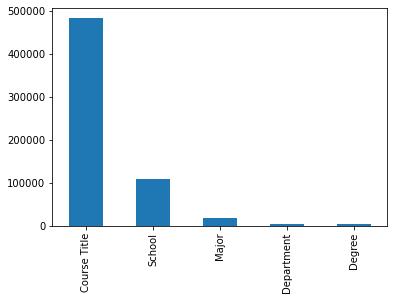

In [20]:
#higher the chi values higher the impo
chi_val = pd.Series(chi_score[0],index=x.columns)
chi_val.sort_values(ascending=False,inplace=True)
chi_val.plot.bar()

[]

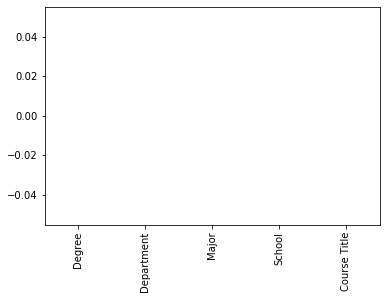

In [24]:
#higher the p values lower the impo
p_val = pd.Series(chi_score[1],index=x.columns)
p_val.sort_values(ascending=False,inplace=True)
p_val.plot.bar()


In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [11]:
#pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Department,Major,Degree,School,Course Title,Cost
Department,1.000000,-0.112327,0.083835,0.047285,-0.039464,-0.006253
Major,-0.112327,1.000000,0.286658,-0.080086,0.150078,0.073165
Degree,0.083835,0.286658,1.000000,-0.039865,0.052111,0.292182
School,0.047285,-0.080086,-0.039865,1.000000,0.046717,0.091214
Course Title,-0.039464,0.150078,0.052111,0.046717,1.000000,0.024471
Cost,-0.006253,0.073165,0.292182,0.091214,0.024471,1.000000


In [12]:
corr_matrix['Cost'].sort_values(ascending=False)

Cost            1.000000
Degree          0.292182
School          0.091214
Major           0.073165
Course Title    0.024471
Department     -0.006253
Name: Cost, dtype: float64

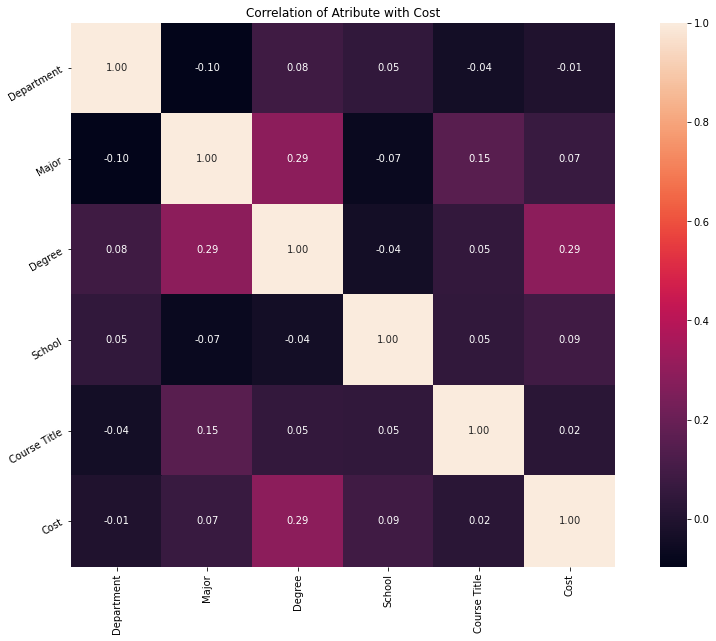

In [19]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Atribute with Cost')
a=sns.heatmap(corr_matrix,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

<AxesSubplot:>

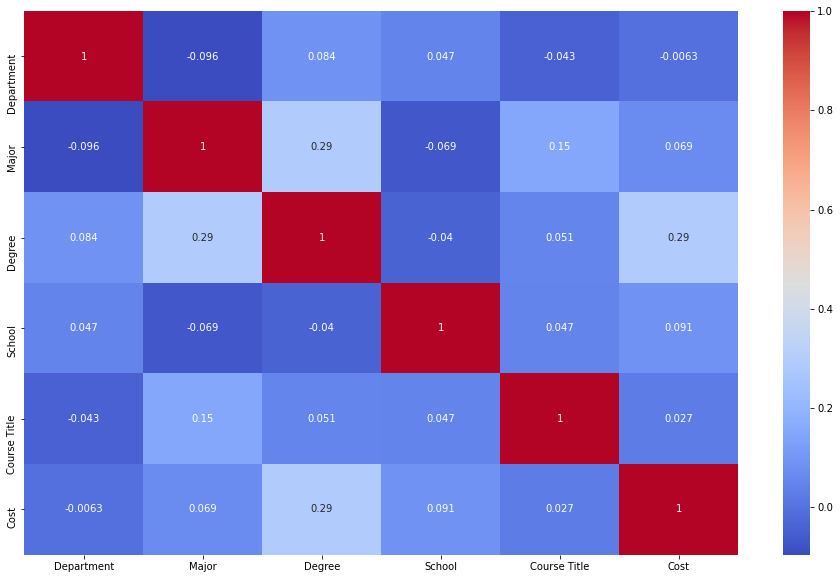

In [86]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

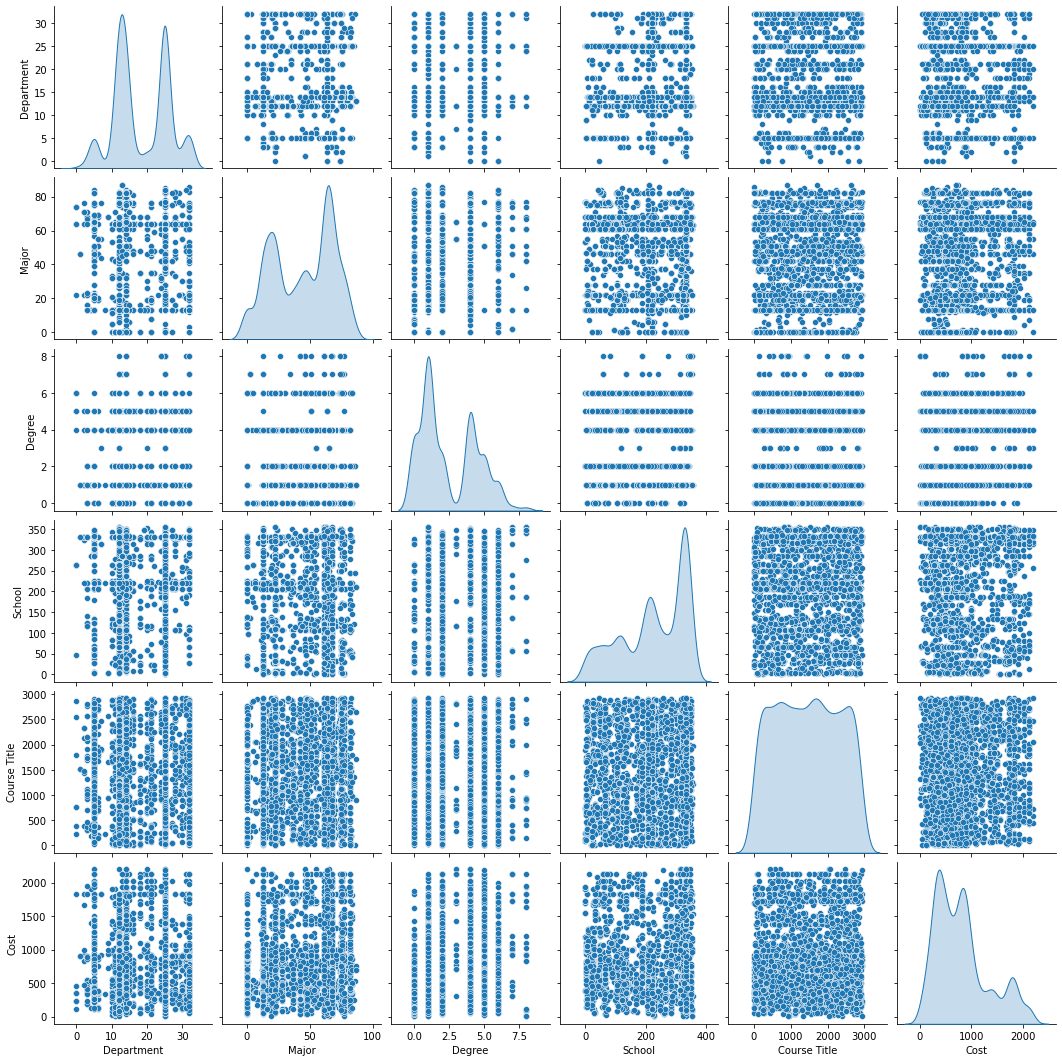

In [43]:
sns.pairplot(df,diag_kind='kde')

In [28]:
x = df.drop(columns=['Degree','Department'],axis=1)
x

,Major,School,Course Title,Cost
0,13,220,1730,392
1,13,220,1967,392
2,13,220,1692,392
3,13,47,2492,1062
4,66,224,2106,1569
...,...,...,...,...
4023,13,187,1966,600
4024,22,26,2817,700
4025,73,16,1302,750
4026,74,263,1909,1830


In [29]:
y = df['Cost']

In [17]:
#apply SelectKBest class to extract tp 10 best feature
# bestfeatures = SelectKBest(score_func=chi2,k=5)
# fit = bestfeatures.fit(x,y)

<AxesSubplot:xlabel='Cost', ylabel='count'>

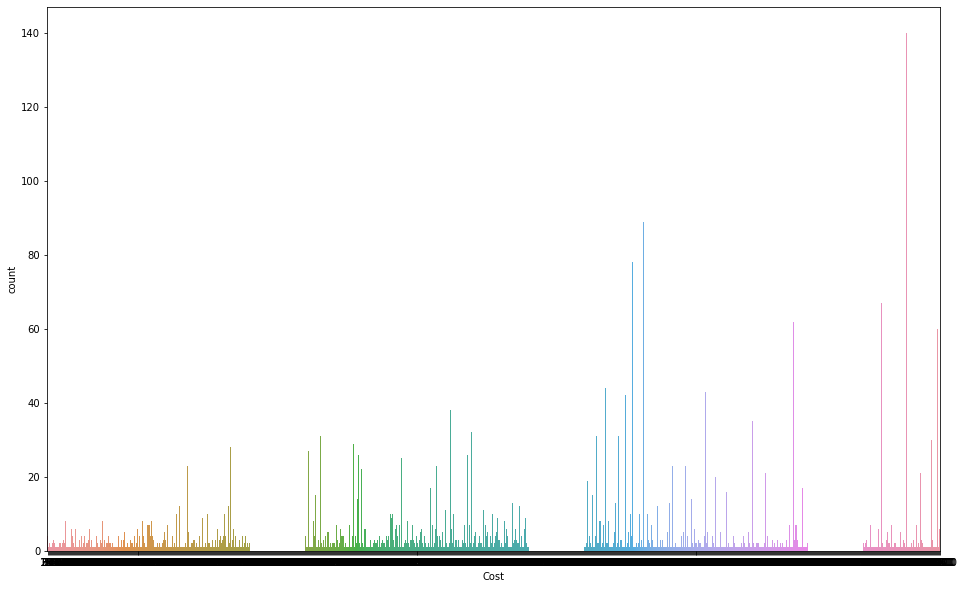

In [90]:
plt.figure(figsize=(16,10))
sns.countplot(x = y,data=df)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [31]:
x_train.shape

(2716, 4)

In [32]:
y_test.shape

(1165,)

In [23]:
from sklearn.preprocessing import Binarizer

In [24]:
bina = Binarizer()
x_train_bin = bina.fit_transform(x_train)
x_test_bin  = bina.transform(x_test)

In [33]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test  = scale.transform(x_test)


In [32]:
scaler = MinMaxScaler()
x_train_min = scale.fit_transform(x_train)
x_test_min  = scale.transform(x_test)

In [35]:
xgb_model = XGBRegressor(n_estimators = 85,learning_rate=0.1,max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from numpy import absolute

In [34]:
xgb_model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb_model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


NameError: name 'RepeatedKFold' is not defined

In [45]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 280.860 (15.464)


In [36]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=85, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
xgb_model.fit(x_train_bin,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=85, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
xgb_model.fit(x_train_min,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=85, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [37]:
scorr=xgb_model.score(x_test,y_test)

In [38]:
scorr

0.9966641472728228

In [39]:
scorr.mean()

0.9966641472728228

In [40]:
# xgb_model.score(x_test_bin,y_test)

In [41]:
# xgb_model.score(x_test_min,y_test)

In [42]:
print('Score is ',xgb_model.score(x_test,y_test)*100,'%')

Score is  99.66641472728229 %


In [43]:
y_pred = xgb_model.predict(x_test)

In [44]:
pd.DataFrame({'Original cost':y_test,'Predicted Cost':y_pred})

,Original cost,Predicted Cost
155,500,516.877686
3971,350,348.888000
3629,600,606.983459
1404,843,849.127625
180,1830,1795.031738
...,...,...
1965,380,358.499817
1661,1830,1800.974976
883,1020,1006.729004
2691,562,583.781067


In [45]:
sum(y_pred!=y_test)

1165

In [47]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [17]:
fold = StratifiedKFold(n_splits=4) # for keeping the splits balanced
fold

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

In [18]:
df = x
target =y

In [48]:
model_params = {'svm':{'model':SVR(gamma = 'auto'),'params':{'C':[1,10,20],'kernel':['rbf','linear']}},
               'random_forest':{'model':RandomForestRegressor(),'params':{'n_estimators':[1,5,10]}}}

In [49]:
scores =[]
models = ['svm','random_forest']
for model_name in models:# model_name ='svm'
    mp = model_params[model_name]
    #mp = {'model':SVC(gamma = 'auto'),'params':{'C':[1,10,20],'kernel':['rbf','linear']}
    gds  = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x_train,y_train)
    scores.append({'model':model_name,'best_score':gds.best_score_,'best_params':gds.best_params_})

In [50]:
scores

[{'model': 'svm',
  'best_score': 0.999999988473034,
  'best_params': {'C': 20, 'kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.9999893446592225,
  'best_params': {'n_estimators': 10}}]

In [51]:
linearmodel = LinearRegression()

In [52]:
linearmodel.fit(x_train,y_train)

LinearRegression()

In [38]:
linearmodel.fit(x_train_bin,y_train)

LinearRegression()

In [54]:
# linearmodel.fit(x_train_min,y_train)

In [55]:
linearmodel.score(x_test,y_test)

1.0

In [40]:
# linearmodel.score(x_test_bin,y_test)

-0.05471001482837545

In [41]:
linearmodel.score(x_test_min,y_test)

0.07954222371376762

In [56]:
y_pred = linearmodel.predict(x_test)

In [57]:
pd.DataFrame({'Original cost':y_test,'Predicted Cost':y_pred})

,Original cost,Predicted Cost
155,500,500.0
3971,350,350.0
3629,600,600.0
1404,843,843.0
180,1830,1830.0
...,...,...
1965,380,380.0
1661,1830,1830.0
883,1020,1020.0
2691,562,562.0


In [58]:
sum(y_pred!=y_test)

923

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [60]:
knn = KNeighborsRegressor(n_neighbors=5) 

In [61]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [62]:
# knn.fit(x_train_bin,y_train)

In [45]:
knn.fit(x_train_min,y_train)

KNeighborsRegressor()

In [63]:
knn.score(x_test,y_test)

0.9866303342538368

In [64]:
# knn.score(x_test_bin,y_test)

In [65]:
# knn.score(x_test_min,y_test)

In [66]:
y_pred = knn.predict(x_test)

In [67]:
sum(y_pred!=y_test)

1118

In [68]:
pd.DataFrame({'Original cost':y_test,'Predicted Cost':y_pred})

,Original cost,Predicted Cost
155,500,549.2
3971,350,369.0
3629,600,730.2
1404,843,852.0
180,1830,1825.4
...,...,...
1965,380,360.6
1661,1830,1830.0
883,1020,1075.0
2691,562,604.8


In [69]:
decimodel = DecisionTreeRegressor()

In [70]:
decimodel.fit(x_train,y_train)

DecisionTreeRegressor()

In [71]:
decimodel.score(x_test,y_test)

0.9999828261681412

dept=LabelEncoder()
df['Department'] = dept.fit_transform(df['Department'])
major=LabelEncoder()
df['Major'] = major.fit_transform(df['Major'])
degree=LabelEncoder()
df['Degree'] = degree.fit_transform(df['Degree'])
school=LabelEncoder()
df['School'] = school.fit_transform(df['School'])
title=LabelEncoder()
df['Course Title'] = title.fit_transform(df['Course Title'])

In [1]:
# dept_ = input("Enter the Department:\n")
# dept_ = int(dept.transform([dept_]))

# major_ = input("Enter your Major\n")
# major_ = int(major.transform([major_]))

# degree_ = input("Enter your heighest degree\n")
# degree_ = int(degree.transform([degree_]))

# school_ = input("Enter the name of your school\n")
# school_ = int(school.transform([school_]))

# title_ = input("Enter your course title\n")
# title_ = int(title.transform([title_]))



In [69]:
dept_ = input("Enter the Department:\n")
dept_ = int(dept.transform([dept_]))

major_ = input("Enter your Major\n")
major_ = int(major.transform([major_]))

degree_ = input("Enter your heighest degree\n")
degree_ = int(degree.transform([degree_]))

school_ = input("Enter the name of your school\n")
school_ = int(school.transform([school_]))

title_ = input("Enter your course title\n")
title_ = int(title.transform([title_]))


Enter the Department:
Management & Budget
Enter your Major
General Business and Management
Enter your heighest degree
Certificate
Enter the name of your school
HOWARD UNIVERSITY
Enter your course title
INTRODUCTION TO BUSINESS


In [73]:
COST = xgb_model.predict([[dept_,major_,degree_,school_,title_]])

In [71]:
linearmodel.predict([[dept_,major_,degree_,school_,title_]])

array([21338.81785908])

In [72]:
 knn.predict([[dept_,major_,degree_,school_,title_]])

array([943.])

In [108]:
xgb_model.predict([[dept_,major_,degree_,school_,title_]])

array([1169.1202], dtype=float32)

In [109]:
linearmodel.predict([[dept_,major_,degree_,school_,title_]])

array([29485.95752348])

In [114]:
Cost=knn.predict([[dept_,major_,degree_,school_,title_]])
print(Cost)

[1127.8]


In [115]:
Cost.round(3)

array([1127.8])

In [74]:
print(COST)

[1169.1202]


In [75]:
COST.round()

array([1169.], dtype=float32)

In [76]:
COST.astype('int')

array([1169])

In [90]:
print('The Cost of the selected course is:',COST)

The Cost of the selected course is: 1169.0


In [87]:
COST=COST[0]

In [89]:
COST=COST.round()

In [33]:
from sklearn import metrics

In [78]:
#prediction on training data
trainig_data_prediction = xgb_model.predict(x_train)

In [79]:
#R squared Value
r2_train = metrics.r2_score(y_train,trainig_data_prediction)

In [80]:
print('R squared Value:',r2_train)

R squared Value: 0.6880516704222318


In [81]:
#prediction on testing data
test_data_prediction = xgb_model.predict(x_test)

In [83]:
r2_test = metrics.r2_score(y_test,test_data_prediction)

In [84]:
print('R squared Value:',r2_test)

R squared Value: 0.40862291285851293


In [34]:
metrics.mean_squared_error(y_test,y_pred)

162805.13083209627